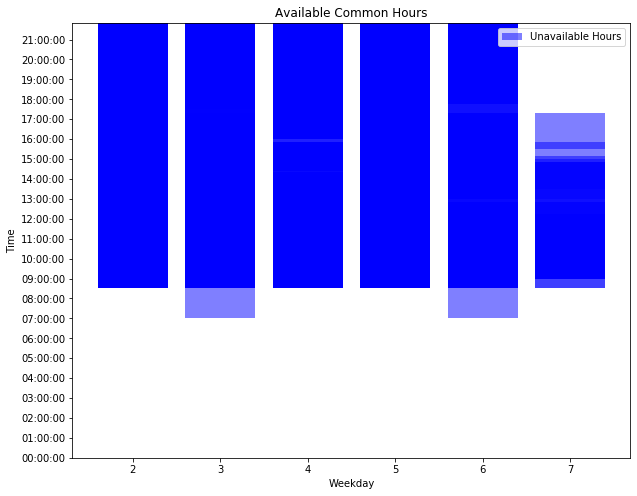

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
import numpy as np
import pandas as pd
from datetime import datetime

data_path='C://Users//Abhinav//Downloads//cs301-project-master (1)//cs301-project-master//Spring 2020_meetings.csv'
data = pd.read_csv(data_path)
data1=data[["weekday", "start", "end"]]

starts = []
stops=[]
for index, row in data1.iterrows():
    s1=row["start"]
    s2=row["end"]
    FMT='%H:%M:%S'
    
    starts.append(datetime.strptime(s1, FMT))
    stops.append(datetime.strptime(s2, FMT))
    index=index+1
#print(type(datetime.strptime(s2, FMT)))
#print(starts)
starts, stops = mpl.dates.date2num(starts), mpl.dates.date2num(stops)
start_times = starts % 1
#start_days = starts - start_times
durations = stops - starts
start_times += int(starts[0]) # So that we have a valid date...
#print(durations)
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
ax.bar(data1['weekday'], durations, bottom=start_times, facecolor='blue', alpha=0.5,align= 'center', label='Unavailable Hours')
ax.set_title('Available Common Hours')
ax.set_xlabel('Weekday')
ax.set_ylabel('Time')
ax.yaxis.set_major_locator(HourLocator())
ax.yaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
#ax.figure.autofmt_xdate()
plt.legend(loc='upper right')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


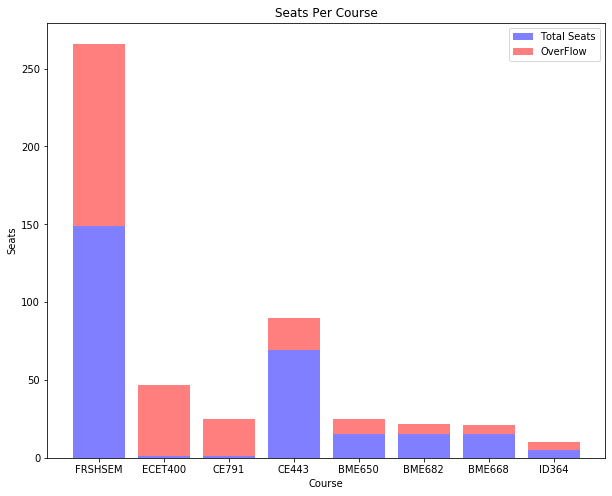

In [269]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
import numpy as np
import pandas as pd
from datetime import datetime

data2_path='C://Users//Abhinav//Downloads//cs301-project-master(1)//cs301-project-master//Spring 2020_sections.csv'
data2 = pd.read_csv(data2_path)
data3=data2[["course_id","seats_taken","seats_total"]]
data3=data3.groupby(["course_id"]).sum()
data4=data3.loc[(data3["seats_taken"] > data3["seats_total"]) & data3["seats_total"] > 0]
data4['overflow']=data4["seats_taken"] - data4["seats_total"]
data4=data4.sort_values(by=['overflow'], ascending=False)
data4=data4.loc[data4["overflow"]/data4["seats_total"]>0.25]
data4=data4.reset_index()
#print(data4)
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
ax.bar(data4['course_id'], data4['seats_total'], facecolor='blue', alpha=0.5,align= 'center', label='Total Seats')
ax.bar(data4['course_id'], data4['overflow'], bottom=data4['seats_total'], facecolor='red', alpha=0.5,align= 'center', label='OverFlow')

ax.set_ylabel('Seats')
ax.set_title('Seats Per Course')
ax.set_xlabel('Course')
ax.legend(loc='upper right')
plt.show()

In [256]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
import numpy as np
import pandas as pd
from datetime import datetime
data_path2='C://Users//Abhinav//Downloads//cs301-project-master(1)//cs301-project-master//Spring 2020_sections.csv'
data_path1='C://Users//Abhinav//Downloads//cs301-project-master(1)//cs301-project-master//Spring 2020_meetings.csv'
data = pd.read_csv(data_path1)
datapath=pd.read_csv(data_path2)
#data1=data[["crn", "room","weekday", "start", "end"]]
#data2=data1.loc[data1["weekday"] == 2]
#data3=data2.dropna()
#dict1={}
#for room in data3["room"]:
    #if room not in dict1:
        #dict1[room]=1
    #else:
        #dict1[room]+=1
#data4=data3[["room", "crn"]]
#data5=data4.groupby(["room"]).count()
#data5=data5.sort_values(by=['crn'], ascending=False)

data1=datapath.join(data,lsuffix='_caller')
suff_list=['0','1','2','3','4','5','6','7','8','9']
#print(data1)
for index, row in data1.iterrows():
    #print("BBBB "+row[0])
    if (row[0].endswith,suff_list):
        #print("AAAA "+row[0])
        row[0]='AAA'
    else:
        print("BBBB "+row[0])
#print(len(data))
#print(datapath)
#print(len(data1))
print(data1)

     course_id section_id  crn_caller  seats_taken  seats_total  \
0       ACC102        KN1       16055            1            0   
1       ACC201        0AC       15931            0            0   
2      ACCT115        002       10001           39           39   
3      ACCT115        102       10002           39           39   
4      ACCT115        104       10003           38           39   
...        ...        ...         ...          ...          ...   
5827   YWCC307        456       15003           30           25   
5828   YWCC307        458       15004           29           25   
5829   YWCC307        460       15005           28           25   
5830   YWCC307        462       15006           28           25   
5831   YWCC691        102       15652           34           35   

            instructor      crn      room  weekday     start       end  
0                  NaN  16055.0       NaN      7.0  08:30:00  12:05:00  
1                  NaN  15931.0       NaN      2.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sections = pd.read_csv("C://Users//Abhinav//Downloads//cs301-project-master(1)//cs301-project-master//Spring 2020_sections.csv")
meetings = pd.read_csv("C://Users//Abhinav//Downloads//cs301-project-master(1)//cs301-project-master//Spring 2020_meetings.csv")

meetings["building"] = meetings["room"].str.split().str[0]
s = sections.loc[sections["course_id"].str.startswith("CS") | sections["course_id"].str.startswith("IT") | sections["course_id"].str.startswith("IS")]
crns = s["crn"]
meetings = meetings.loc[pd.notna(meetings["building"])]
meetings = meetings.loc[meetings["crn"].isin(crns)]
gb = meetings.groupby("building")["crn"].count()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
items = list(zip(*(dict(gb).items())))
ax.bar(*items)
plt.title("Course Sections per Building (CS/IS/IT)")
plt.ylabel("Sections")
plt.xlabel("Building")
plt.show()
print("The building with the most sections (max):", max(dict(gb), key=lambda x: dict(gb)[x]), ":", dict(gb)[max(dict(gb), key=lambda x: dict(gb)[x])])

FileNotFoundError: [Errno 2] File b'C://Users//Abhinav//Downloads//cs301-project-master(1)//cs301-project-master//Spring 2020_sections.csv' does not exist: b'C://Users//Abhinav//Downloads//cs301-project-master(1)//cs301-project-master//Spring 2020_sections.csv'